# **2401PTDS Regression Project: Analyzing CO2 Emissions from the Agri-food Sector**

## **Introduction**

In this project, we will explore and analyze the impact of agricultural activities on climate change, focusing on the role of CO2 emissions in the agri-food sector. Agriculture is a major contributor to global greenhouse gas emissions, and understanding these emissions is critical for developing sustainable practices that can mitigate climate change.

This project is part of a larger initiative by a coalition of agricultural stakeholders, including policymakers, environmental organizations, and agricultural businesses. The primary objective of this project is to analyze the effects of various emission sources from the agri-food sector, with a particular focus on how these emissions influence climate change, specifically average temperature increases.

We will utilize a dataset compiled from reliable sources such as the Food and Agriculture Organization (FAO) and the Intergovernmental Panel on Climate Change (IPCC). This dataset includes information on various emission sources such as:

- **Savanna Fires**: Emissions from fires in savanna ecosystems.
- **Forest Fires**: Emissions from forest fires.
- **Crop Residues**: Emissions from burning or decomposing plant material after harvest.
- **Rice Cultivation**: Emissions from methane release in rice paddies.
- **Drained Organic Soils**: Emissions of CO2 from draining organic soils.
- **Food Transport**: Emissions from the transportation of food products.
- **On-farm Energy Use**: Emissions from energy consumed on farms.
- **Food Packaging**: Emissions from the production and disposal of food packaging materials.

Additionally, we will examine the relationship between these emissions and the **average temperature** of the areas studied, as temperature change is one of the most significant indicators of climate change.

The dataset also includes features such as **forestland**, which serves as a natural carbon sink, mitigating some of the negative emissions from agriculture. Understanding the balance between emissions and carbon sequestration is key to identifying strategies for sustainable agricultural practices.

Our goal is to use regression analysis to understand how these emission sources correlate with average temperature increases. By the end of this project, we aim to provide actionable insights and recommendations that will help stakeholders in the agri-food sector mitigate their environmental impact and promote sustainability.

---

This introduction sets up the project by explaining the goals, context, and dataset. Let me know if you need more details or adjustments!

## **Data Loading**

In this section, we load the dataset containing emissions data from the agri-food sector. Using Pandas, we read the CSV file into a DataFrame to examine its structure and the first few records. This allows us to verify the dataset's contents and ensure it's properly loaded for further analysis.




In [30]:
# 2. Data Loading

# Importing necessary libraries
import pandas as pd

# Loading the dataset
# Replace 'your_dataset.csv' with the actual file path to your dataset
df = pd.read_csv("co2_emissions_from_agri.csv")

# Display the first 5 rows to understand the structure of the data
df.head()


,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,...,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,...,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250


## **Data Overview**


In [31]:
# 2. Descriptive statistics
print("\nDescriptive statistics:")
print(df.describe())


Descriptive statistics:
              Year  Savanna fires  Forest fires  Crop Residues  \
count  6965.000000    6934.000000   6872.000000    5576.000000   
mean   2005.124910    1188.390893    919.302167     998.706309   
std       8.894665    5246.287783   3720.078752    3700.345330   
min    1990.000000       0.000000      0.000000       0.000200   
25%    1997.000000       0.000000      0.000000      11.006525   
50%    2005.000000       1.651850      0.517900     103.698200   
75%    2013.000000     111.081400     64.950775     377.640975   
max    2020.000000  114616.401100  52227.630600   33490.074100   

       Rice Cultivation  Drained organic soils (CO2)  \
count       6965.000000                  6965.000000   
mean        4259.666673                  3503.228636   
std        17613.825187                 15861.445678   
min            0.000000                     0.000000   
25%          181.260800                     0.000000   
50%          534.817400                     

## **Missing Values**



In [32]:
# 3. Missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
Area                                  0
Year                                  0
Savanna fires                        31
Forest fires                         93
Crop Residues                      1389
Rice Cultivation                      0
Drained organic soils (CO2)           0
Pesticides Manufacturing              0
Food Transport                        0
Forestland                          493
Net Forest conversion               493
Food Household Consumption          473
Food Retail                           0
On-farm Electricity Use               0
Food Packaging                        0
Agrifood Systems Waste Disposal       0
Food Processing                       0
Fertilizers Manufacturing             0
IPPU                                743
Manure applied to Soils             928
Manure left on Pasture                0
Manure Management                   928
Fires in organic soils                0
Fires in humid tropical forests     155
On-farm energy use     

## ** Correlation matrix**
The code selects numeric columns from the dataset, calculates the correlation matrix to examine relationships between numeric variables, and then plots a heatmap to visually display these correlations.


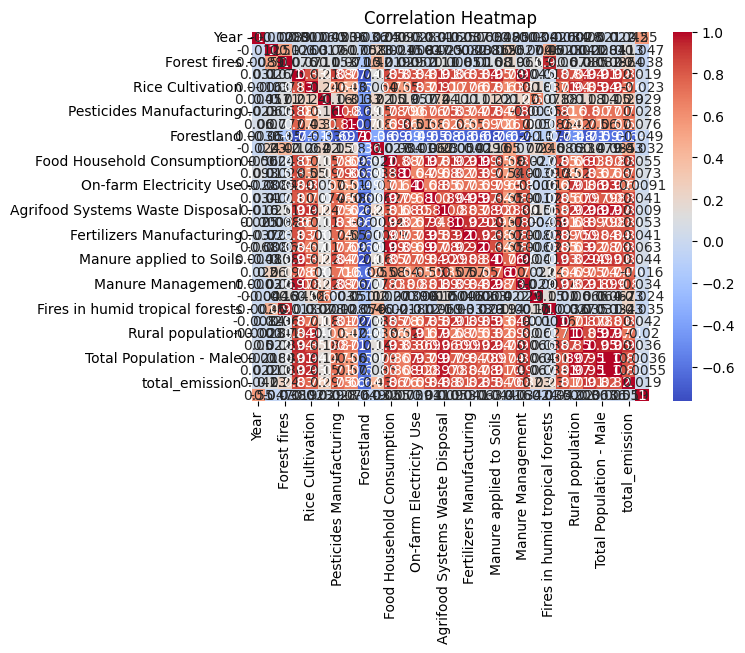

In [33]:

# 2. Clean non-numeric columns and select only numeric columns for correlation
numeric_df = df.select_dtypes(include=[float, int])

# 3. Calculate the correlation matrix
corr = numeric_df.corr()

# 4. Plot the correlation matrix as a heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()



## **Diatribution of target variable**

The code visualizes the distribution of the target variable using a histogram, helping to understand its spread, central tendency, and any skewness or outliers in the data.

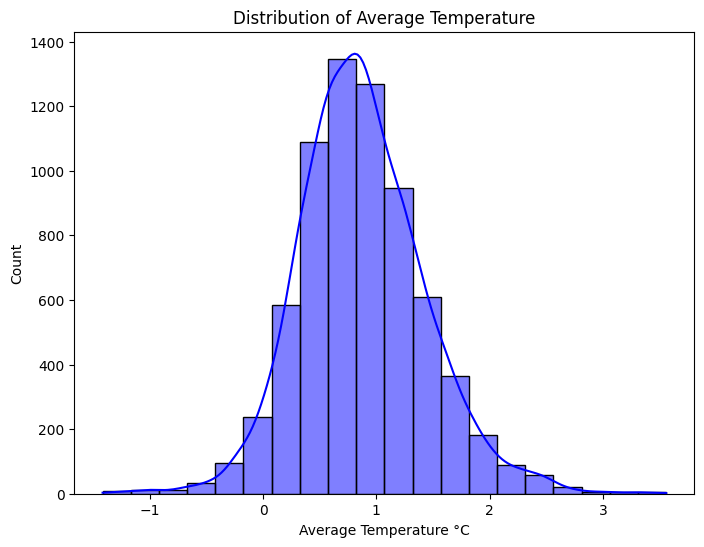

In [34]:
# 8. Distribution of Target Variable (Average Temperature)
plt.figure(figsize=(8, 6))
sns.histplot(df['Average Temperature °C'], kde=True, color='blue', bins=20)
plt.title("Distribution of Average Temperature")
plt.show()

## **Perform train-test splits.**
Train-test split divides data into two sets: one for training the model and the other for testing its performance. It ensures the model generalizes well to new data. Typically, 80% of the data is used for training, and 20% is used for testing.


In [ ]:
# Print out the column names of the DataFrame to identify the target variable
print(df.columns)




Index(['Area', 'Year', 'Savanna fires', 'Forest fires', 'Crop Residues',
       'Rice Cultivation', 'Drained organic soils (CO2)',
       'Pesticides Manufacturing', 'Food Transport', 'Forestland',
       'Net Forest conversion', 'Food Household Consumption', 'Food Retail',
       'On-farm Electricity Use', 'Food Packaging',
       'Agrifood Systems Waste Disposal', 'Food Processing',
       'Fertilizers Manufacturing', 'IPPU', 'Manure applied to Soils',
       'Manure left on Pasture', 'Manure Management', 'Fires in organic soils',
       'Fires in humid tropical forests', 'On-farm energy use',
       'Rural population', 'Urban population', 'Total Population - Male',
       'Total Population - Female', 'total_emission',
       'Average Temperature °C'],
      dtype='object')


In [39]:
from sklearn.model_selection import train_test_split

# Replace 'your_target_column' with the actual target column name
X = df.drop('total_emission', axis=1)  # Features
y = df['Average Temperature °C']  # Target variable

# Perform the split, with 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting splits
print("Training Features Shape:", X_train.shape)
print("Testing Features Shape:", X_test.shape)
print("Training Target Shape:", y_train.shape)
print("Testing Target Shape:", y_test.shape)


Training Features Shape: (5572, 30)
Testing Features Shape: (1393, 30)
Training Target Shape: (5572,)
Testing Target Shape: (1393,)
